In [1]:
import pandas as pd
import numpy as np
import unidecode
import matplotlib as mpl
from adjustText import adjust_text
import matplotlib.pyplot as plt

In [2]:
background = '#D7E5E5'
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 15
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['savefig.facecolor']='white'
mpl.rcParams['axes.titleweight'] = 'heavy'
mpl.rcParams['axes.labelweight'] = 'heavy'

In [3]:
url_gk = 'https://fbref.com/en/comps/Big5/keepers/players/Big-5-European-Leagues-Stats'
url_gkad = 'https://fbref.com/en/comps/Big5/keepersadv/players/Big-5-European-Leagues-Stats'

In [4]:
data_gk = pd.read_html(url_gk, header=1)[0]
data_gk = data_gk[data_gk['Player'] != 'Player']
data_gk = data_gk.drop(columns=['Rk', 'Matches'])
data_gk

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm,Save%.1
0,Julen Agirrezabala,es ESP,GK,Athletic Club,es La Liga,21-052,2000,4,4,360,...,1,2,1,1,25.0,0,0,0,0,NaN
1,Doğan Alemdar,tr TUR,GK,Rennes,fr Ligue 1,19-110,2002,5,5,450,...,2,0,3,2,40.0,0,0,0,0,NaN
2,Alisson,br BRA,GK,Liverpool,eng Premier League,29-137,1992,22,22,1980,...,15,5,2,12,54.5,0,0,0,0,NaN
3,Alphonse Areola,fr FRA,GK,West Ham,eng Premier League,28-354,1993,1,1,90,...,0,0,1,0,0.0,0,0,0,0,NaN
4,Kepa Arrizabalaga,es ESP,GK,Chelsea,eng Premier League,27-136,1994,4,4,360,...,2,1,1,2,50.0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Guglielmo Vicario,it ITA,GK,Empoli,it Serie A,25-132,1996,25,25,2250,...,8,7,10,4,16.0,6,3,1,2,25.0
192,Freddie Woodman,eng ENG,GK,Newcastle Utd,eng Premier League,24-349,1997,4,4,360,...,0,1,3,0,0.0,3,2,1,0,33.3
193,Robin Zentner,de GER,GK,Mainz 05,de Bundesliga,27-111,1994,22,22,1980,...,9,4,9,8,36.4,3,2,1,0,33.3
194,Luca Zidane,fr FRA,"GK,MF",Rayo Vallecano,es La Liga,23-279,1998,4,4,285,...,0,1,3,0,0.0,0,0,0,0,NaN


In [5]:
data_gkad = pd.read_html(url_gkad, header=1)[0]
data_gkad = data_gkad[data_gkad['Player'] != 'Player']
data_gkad = data_gkad.drop(columns=['Rk', 'Matches'])
data_gkad

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,GA,PKA,...,AvgLen,Att.2,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,Julen Agirrezabala,es ESP,GK,Athletic Club,es La Liga,21-052,2000,4.0,5,0,...,36.8,26,38.5,38.3,35,2,5.7,5,1.25,17.3
1,Doğan Alemdar,tr TUR,GK,Rennes,fr Ligue 1,19-110,2002,5.0,4,0,...,34.6,29,86.2,57.7,46,1,2.2,7,1.40,14.3
2,Alisson,br BRA,GK,Liverpool,eng Premier League,29-137,1992,22.0,17,0,...,29.9,99,41.4,37.7,145,15,10.3,34,1.55,17.6
3,Alphonse Areola,fr FRA,GK,West Ham,eng Premier League,28-354,1993,1.0,1,0,...,49.7,14,71.4,53.2,13,1,7.7,0,0.00,7.0
4,Kepa Arrizabalaga,es ESP,GK,Chelsea,eng Premier League,27-136,1994,4.0,2,0,...,30.8,21,28.6,30.3,31,1,3.2,5,1.25,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Guglielmo Vicario,it ITA,GK,Empoli,it Serie A,25-132,1996,25.0,48,3,...,31.6,186,45.7,40.0,273,28,10.3,10,0.40,12.9
192,Freddie Woodman,eng ENG,GK,Newcastle Utd,eng Premier League,24-349,1997,4.0,12,2,...,43.3,43,65.1,52.0,33,2,6.1,0,0.00,11.6
193,Robin Zentner,de GER,GK,Mainz 05,de Bundesliga,27-111,1994,22.0,24,2,...,36.9,173,46.2,41.5,177,16,9.0,26,1.18,16.7
194,Luca Zidane,fr FRA,"GK,MF",Rayo Vallecano,es La Liga,23-279,1998,3.2,4,0,...,35.3,28,60.7,47.9,21,2,9.5,2,0.63,12.3


In [6]:
data_gk.iloc[:, 7:] = data_gk.iloc[:, 7:].astype(float)
data_gkad.iloc[:, 7:] = data_gkad.iloc[:, 7:].astype(float)
data_gkad = data_gkad.drop(columns=['Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'])

In [7]:
player_data = pd.merge(data_gk, data_gkad, on="Player")
player_data = player_data.drop_duplicates(subset='Player')

In [8]:
player_data

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,AvgLen,Att.2,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,Julen Agirrezabala,es ESP,GK,Athletic Club,es La Liga,21-052,2000,4.0,4.0,360.0,...,36.8,26.0,38.5,38.3,35.0,2.0,5.7,5.0,1.25,17.3
1,Doğan Alemdar,tr TUR,GK,Rennes,fr Ligue 1,19-110,2002,5.0,5.0,450.0,...,34.6,29.0,86.2,57.7,46.0,1.0,2.2,7.0,1.4,14.3
2,Alisson,br BRA,GK,Liverpool,eng Premier League,29-137,1992,22.0,22.0,1980.0,...,29.9,99.0,41.4,37.7,145.0,15.0,10.3,34.0,1.55,17.6
3,Alphonse Areola,fr FRA,GK,West Ham,eng Premier League,28-354,1993,1.0,1.0,90.0,...,49.7,14.0,71.4,53.2,13.0,1.0,7.7,0.0,0.0,7.0
4,Kepa Arrizabalaga,es ESP,GK,Chelsea,eng Premier League,27-136,1994,4.0,4.0,360.0,...,30.8,21.0,28.6,30.3,31.0,1.0,3.2,5.0,1.25,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Guglielmo Vicario,it ITA,GK,Empoli,it Serie A,25-132,1996,25.0,25.0,2250.0,...,31.6,186.0,45.7,40.0,273.0,28.0,10.3,10.0,0.4,12.9
189,Freddie Woodman,eng ENG,GK,Newcastle Utd,eng Premier League,24-349,1997,4.0,4.0,360.0,...,43.3,43.0,65.1,52.0,33.0,2.0,6.1,0.0,0.0,11.6
190,Robin Zentner,de GER,GK,Mainz 05,de Bundesliga,27-111,1994,22.0,22.0,1980.0,...,36.9,173.0,46.2,41.5,177.0,16.0,9.0,26.0,1.18,16.7
191,Luca Zidane,fr FRA,"GK,MF",Rayo Vallecano,es La Liga,23-279,1998,4.0,4.0,285.0,...,35.3,28.0,60.7,47.9,21.0,2.0,9.5,2.0,0.63,12.3


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

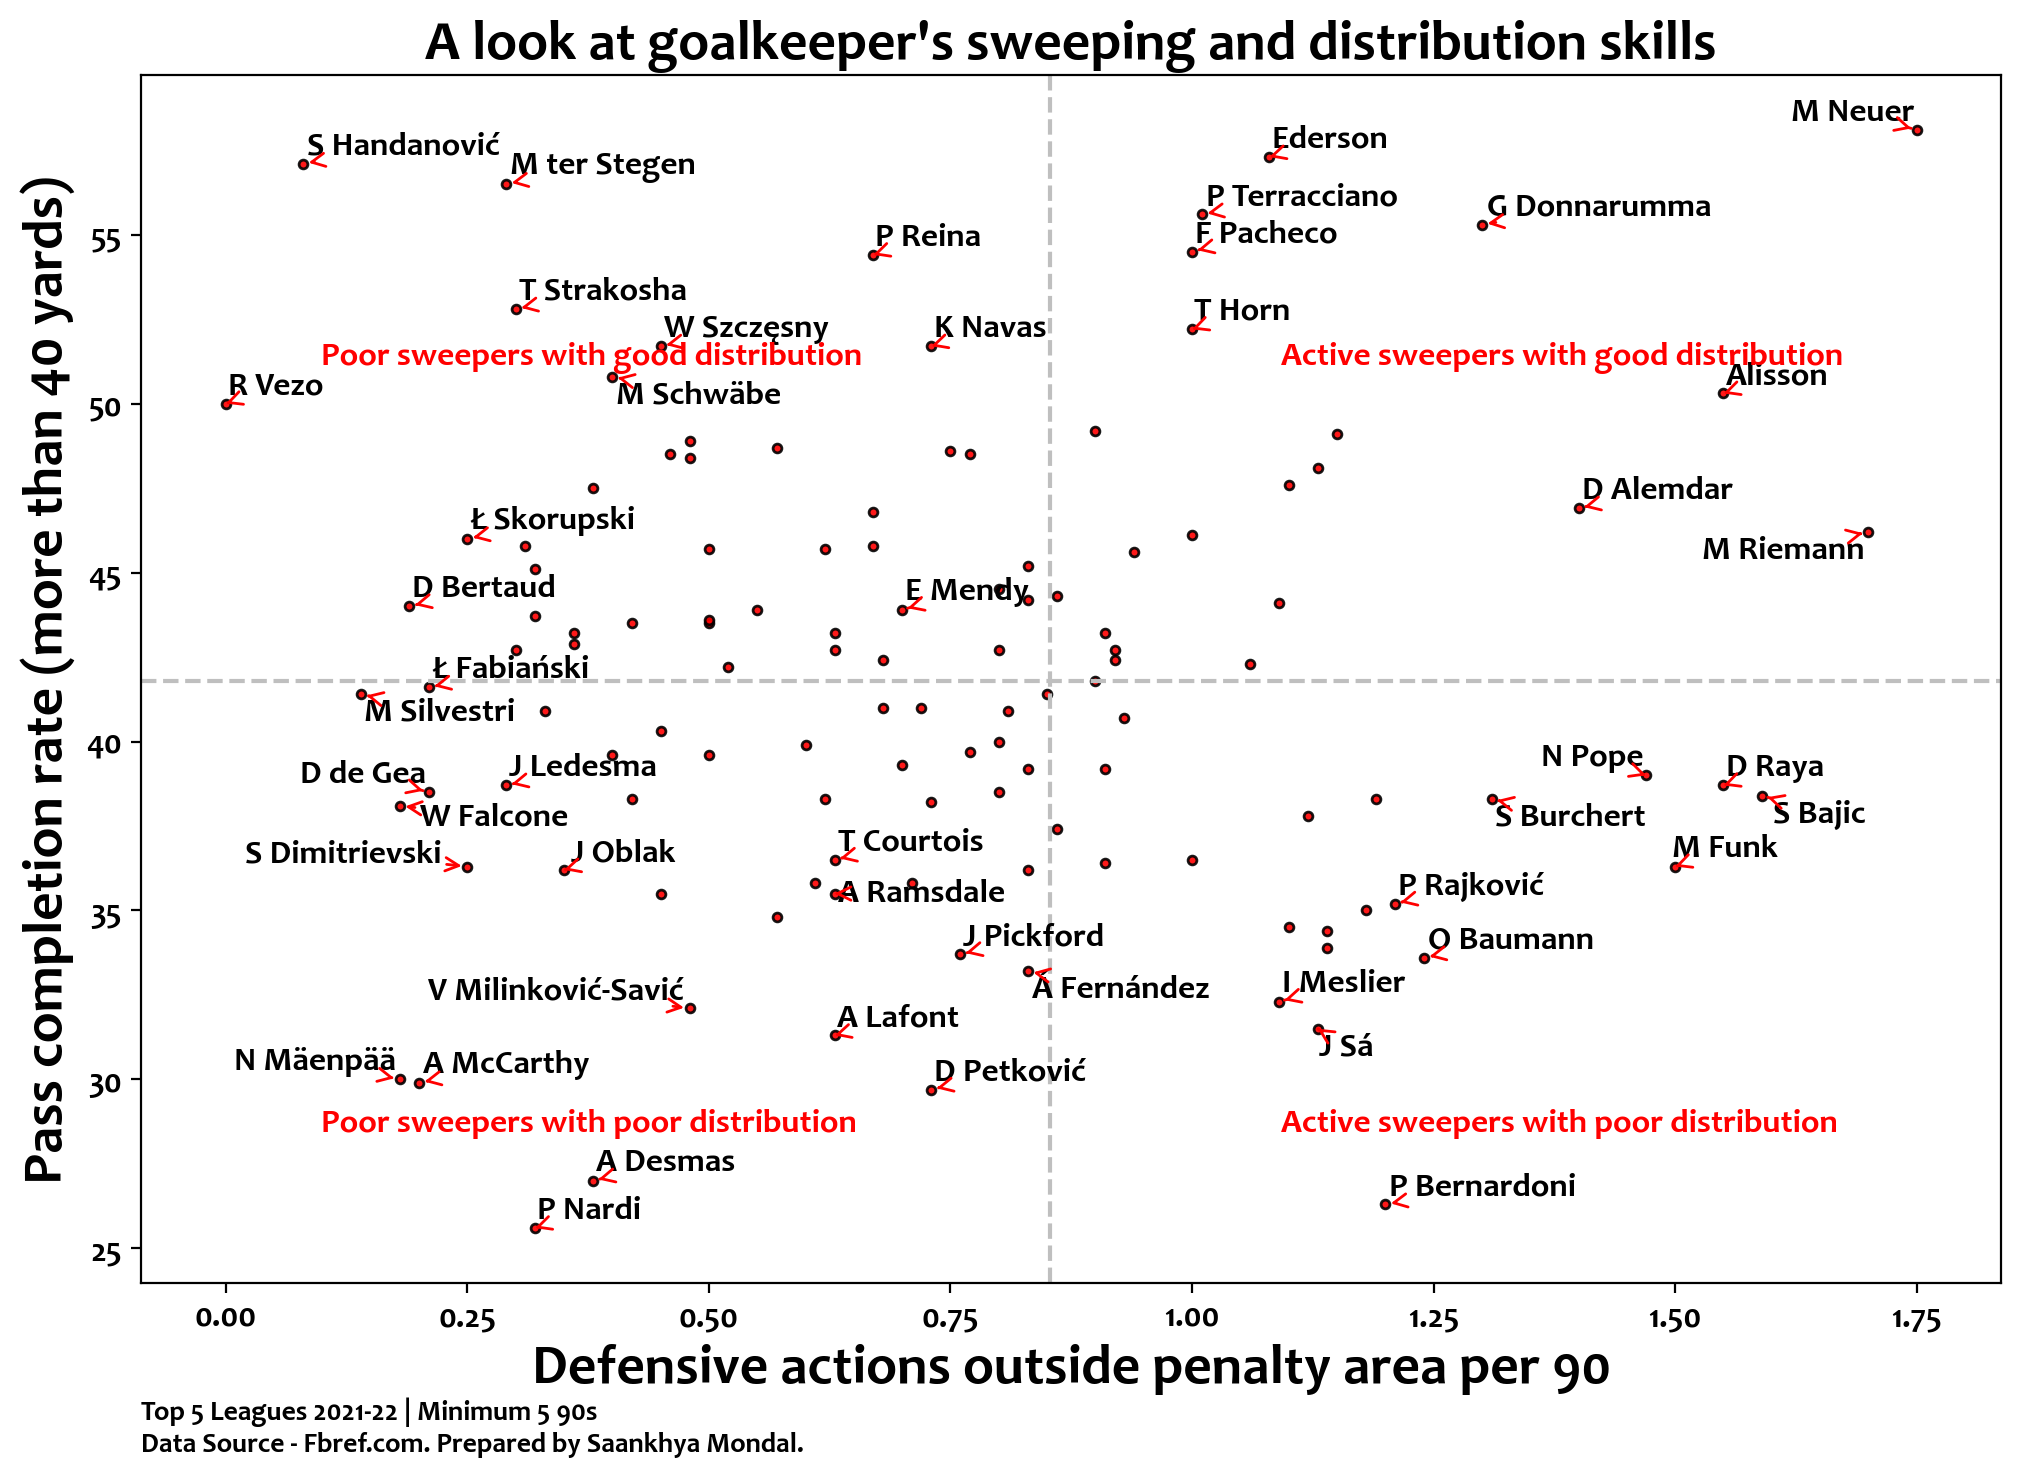

In [9]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
gks = ['Neuer', 'Alisson', 'Mendy', 'Ter Stegen', 'Oblak', 'Ederson', 'De Gea', 'Ramsdale', 'Courtois', 'Arrizabalaga']
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
ax.axhline(data['Cmp%'].quantile(0.5), ls='--', lw=1.5, c='#BFBFBF')
ax.axvline(data['#OPA/90'].quantile(0.65), ls='--', lw=1.5, c='#BFBFBF')

outlier_top = data['Cmp%'].quantile(0.900)
outlier_bottom = data['Cmp%'].quantile(0.100)
outlier_right = data['#OPA/90'].quantile(0.900)
outlier_left = data['#OPA/90'].quantile(0.100)

def check_name_present(name):
    for i in gks:
        if i in name:
            return True
    return False

par_x = list(data['#OPA/90'].astype(float))
par_y = list(data['Cmp%'].astype(float))
scatter = plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top or par_x[i]<outlier_left or par_y[i]<outlier_bottom or check_name_present(txt):
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))


fig.text(0.6,0.7,'Active sweepers with good distribution', color = 'red', size=12)
fig.text(0.6,0.22,'Active sweepers with poor distribution', color = 'red', size=12)
fig.text(0.2,0.7,'Poor sweepers with good distribution', color = 'red', size=12)
fig.text(0.2,0.22,'Poor sweepers with poor distribution', color = 'red', size=12)


ax.set_xlabel('Defensive actions outside penalty area per 90', fontsize=20)
ax.set_ylabel('Pass completion rate (more than 40 yards)', fontsize=20)
ax.set_title('A look at goalkeeper\'s sweeping and distribution skills', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

posx and posy should be finite values


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

posx and posy should be finite values
posx and posy should be finite values


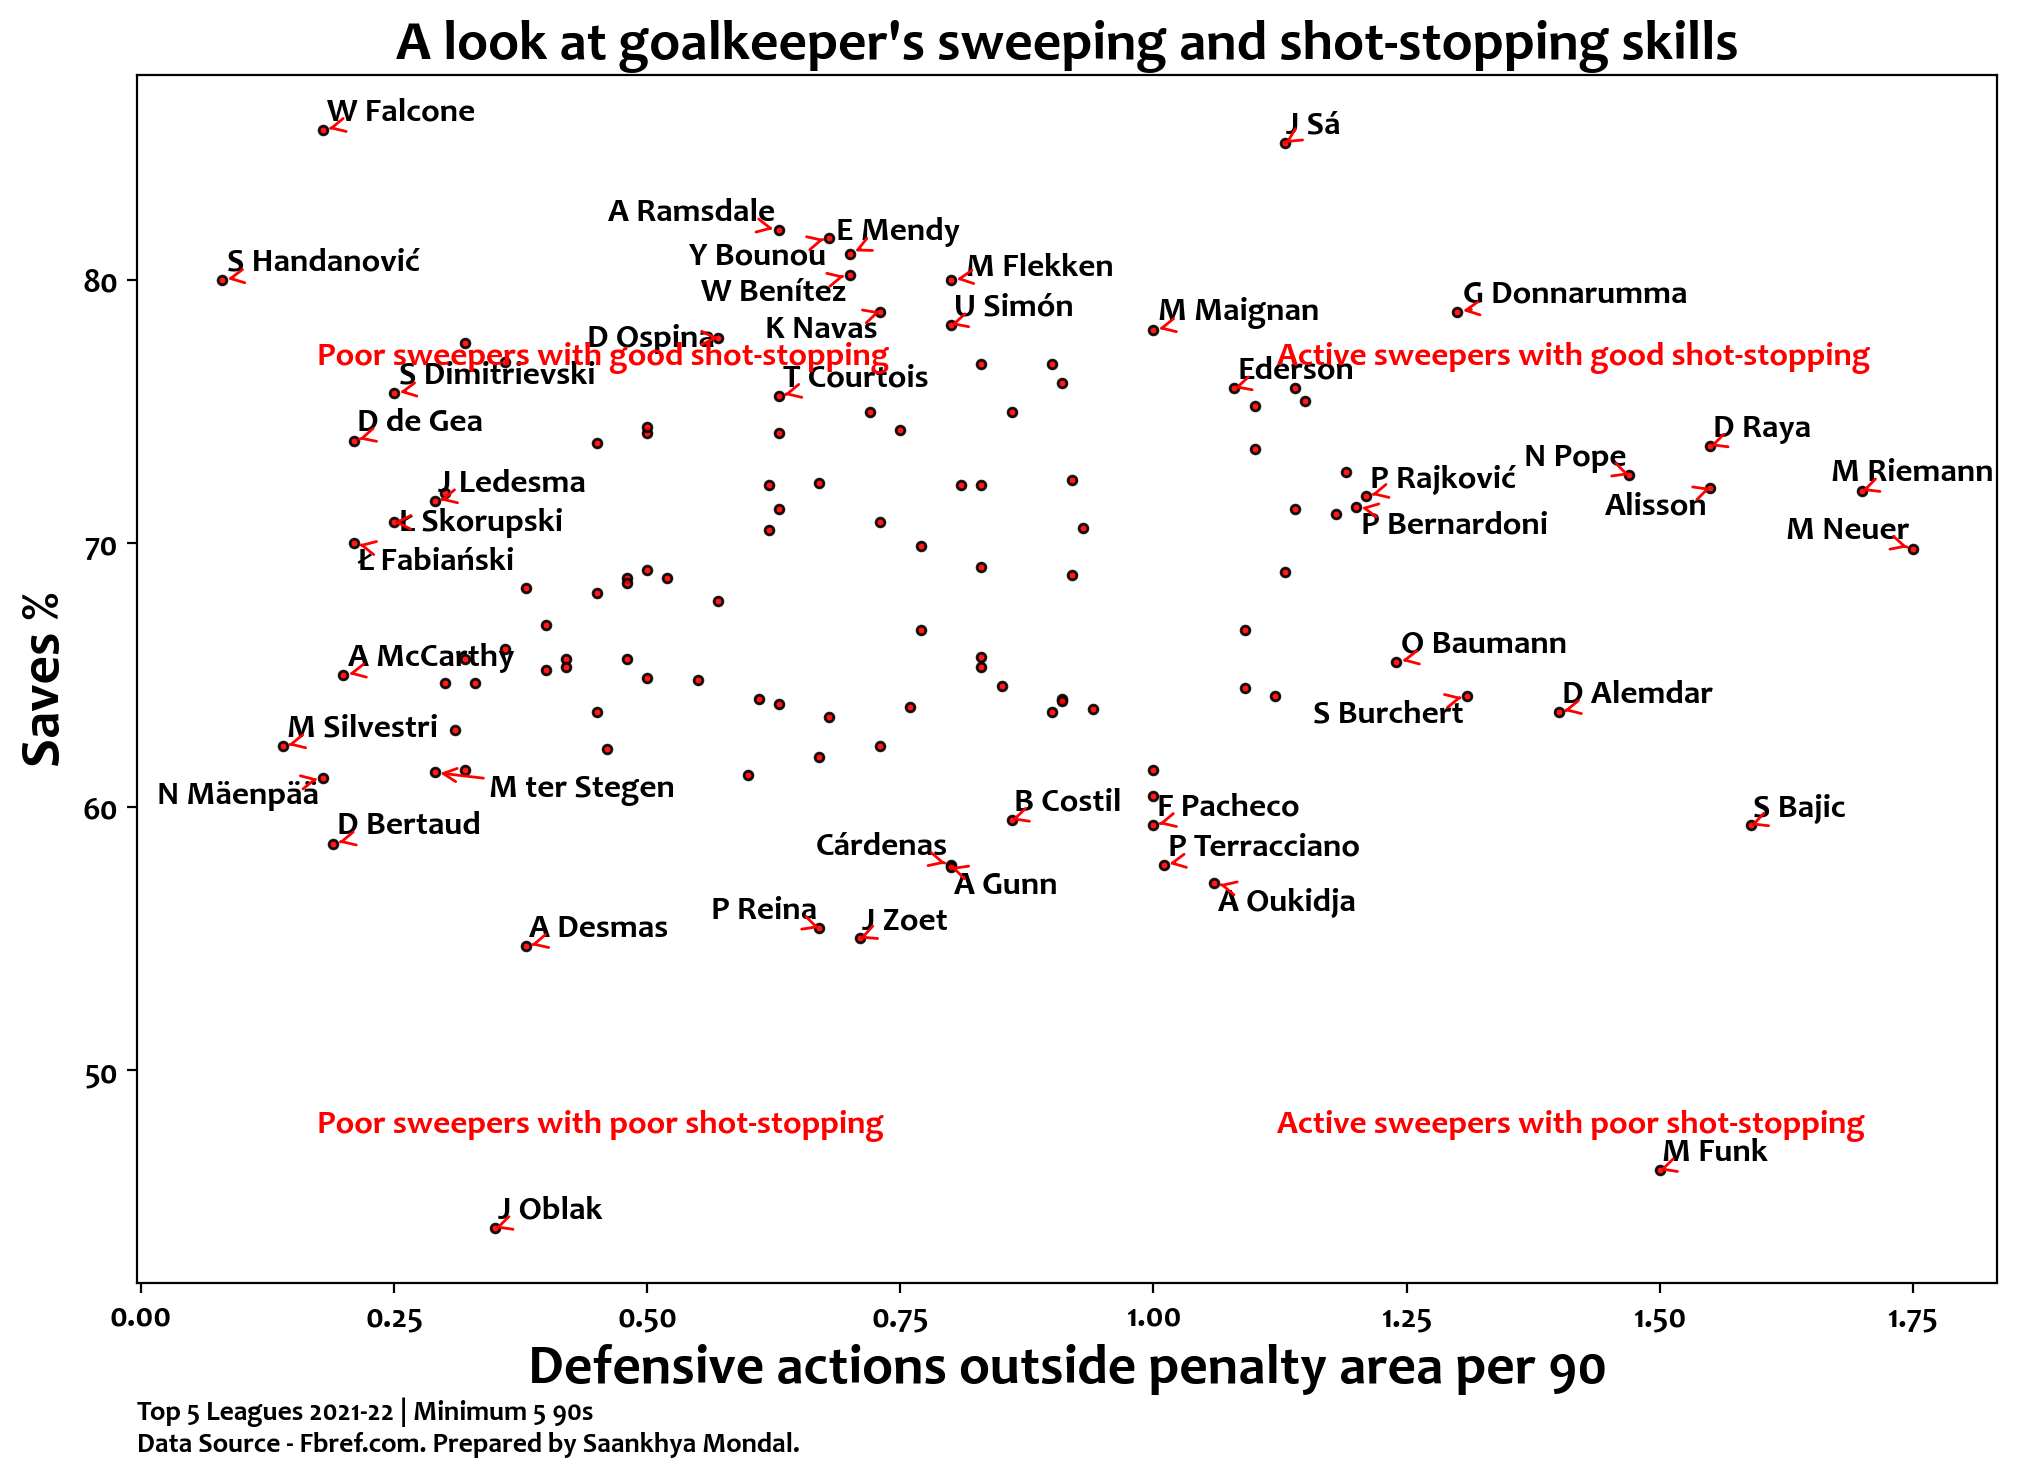

In [10]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
gks = ['Neuer', 'Alisson', 'Mendy', 'Ter Stegen', 'Oblak', 'Ederson', 'De Gea', 'Ramsdale', 'Courtois', 'Arrizabalaga']
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['Save%'].quantile(0.900)
outlier_bottom = data['Save%'].quantile(0.100)
outlier_right = data['#OPA/90'].quantile(0.900)
outlier_left = data['#OPA/90'].quantile(0.100)

def check_name_present(name):
    for i in gks:
        if i in name:
            return True
    return False

par_x = list(data['#OPA/90'].astype(float))
par_y = list(data['Save%'].astype(float))
scatter = plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top or par_x[i]<outlier_left or par_y[i]<outlier_bottom or check_name_present(txt):
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

fig.text(0.6,0.7,'Active sweepers with good shot-stopping', color = 'red', size=12)
fig.text(0.6,0.22,'Active sweepers with poor shot-stopping', color = 'red', size=12)
fig.text(0.2,0.7,'Poor sweepers with good shot-stopping', color = 'red', size=12)
fig.text(0.2,0.22,'Poor sweepers with poor shot-stopping', color = 'red', size=12)

ax.set_xlabel('Defensive actions outside penalty area per 90', fontsize=20)
ax.set_ylabel('Saves %', fontsize=20)
ax.set_title('A look at goalkeeper\'s sweeping and shot-stopping skills', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [11]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 192
Data columns (total 51 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Player     187 non-null    object
 1   Nation     187 non-null    object
 2   Pos        187 non-null    object
 3   Squad      187 non-null    object
 4   Comp       187 non-null    object
 5   Age        187 non-null    object
 6   Born       187 non-null    object
 7   MP         187 non-null    object
 8   Starts     187 non-null    object
 9   Min        187 non-null    object
 10  90s        187 non-null    object
 11  GA_x       187 non-null    object
 12  GA90       187 non-null    object
 13  SoTA       187 non-null    object
 14  Saves      187 non-null    object
 15  Save%      185 non-null    object
 16  W          187 non-null    object
 17  D          187 non-null    object
 18  L          187 non-null    object
 19  CS         187 non-null    object
 20  CS%        184 non-null    objec